# Value Iteration Explained

Value Iteration is an iterative algorithm used to find the optimal value function at every state for an Markov Decision Process.

It combines policy evaluation and improvement into a single step.

The optimal value is the cumulative expected reward an agent can achieve from a given state following an optimal policy.

## Code Framework 

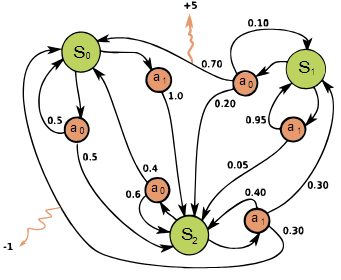

## Transition Probabilities and Rewards

In [4]:
transition_probs = {
    "s0": {
        "a0": {"s0": 0.5, "s2": 0.5},
        "a1": {"s2": 1}
    },
    "s1": {
        "a0": {"s0": 0.7, "s1": 0.1, "s2": 0.2},
        "a1": {"s1": 0.95, "s2": 0.05}
    },
    "s2": {
        "a0": {"s0": 0.4, "s2": 0.6},
        "a1": {"s0": 0.3, "s1": 0.3, "s2": 0.4}
    }
}
rewards = {
    "s1": {"a0": {"s0": +5}},
    "s2": {"a1": {"s0": -1}}
}


from mdp import MDP
mdp = MDP(transition_probs, rewards, initial_state="s0")

ModuleNotFoundError: No module named 'mdp'

In [5]:
# The transition probabilities transition_probs define 
# how states can move from one to another when actions are taken. 

# For example, from state "s0" taking action "a0", 
# there is a probability of 0.5 going back to "s0" or 
# moving to "s2" with a probability of 0.5. 

# The rewards 'rewards' specify the immediate rewards 
# obtained at each state-action pair.

In [ ]:
print("initial state =", mdp.reset())
next_state, reward, done, info = mdp.step("a1")
print(f"next_state = {next_state}, reward = {reward}, done = {done}")

In [ ]:
print("mdp.get_all_states =", mdp.get_all_states())
print("mdp.get_possible_actions(\"s1\") = ", mdp.get_possible_actions("s1"))
print("mdp.get_next_states(\"s1\"b, \"a0\") = ", mdp.get_next_states("s1", "a0"))
print("mdp.get_reward(\"s1\", \"a0\", \"s0\") = ", mdp.get_reward("s1", "a0", "s0"))
print("mdp.get_transition_prob(\"s1\", \"a0\", \"s0\") = ", mdp.get_transition_prob("s1", "a0", "s0"))

### Optional: Visualizing MDPs

You can also visualize any MDP with the implemented drawing fuctions.

You have to install graphviz for system and for python. 

1. * For ubuntu just run: `sudo apt-get install graphviz` 
   * For OSX: `brew install graphviz`
2. `pip install graphviz`
3. restart the notebook

**Note:** Installing graphviz on some OS (esp. Windows) may be tricky. However, you can ignore this part alltogether and use the standard vizualization.

In [ ]:
from mdp import has_graphviz
from IPython.display import display
print("Graphviz available:", has_graphviz)

In [ ]:
if has_graphviz:
    from mdp import plot_graph, plot_graph_with_state_values, plot_graph_optimal_strategy_and_state_values
    display(plot_graph(mdp))

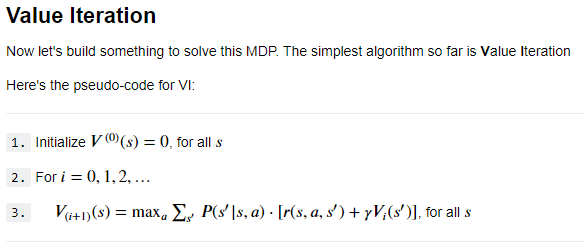

## Action-Value Function

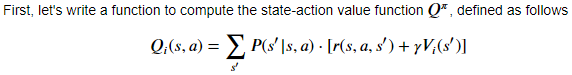

In [ ]:
# To compute the optimal policy, we first calculate the Q-function, 
# also known as the action-value function, 
# which represents the expected cumulative discounted reward starting 
# from a specific state-action pair [s_prime in mdp.get_next_states(state, action)]

In [ ]:
def get_action_value(mdp, state_values, state, action, gamma):
    """ Computes Q(s,a) as in formula above """
    Q = 0
    for s_prime in mdp.get_next_states(state, action):
        r = mdp.get_reward(state, action, s_prime)
        trans = mdp.get_transition_prob(state, action, s_prime)
        Q += trans * (r + gamma * state_values[s_prime])
    return Q

In [ ]:
import numpy as np
test_Vs = {s: i for i, s in enumerate(sorted(mdp.get_all_states()))}
assert np.isclose(get_action_value(mdp, test_Vs, "s2", "a1", 0.9), 0.69)
assert np.isclose(get_action_value(mdp, test_Vs, "s1", "a0", 0.9), 3.95)

## State-Value Function

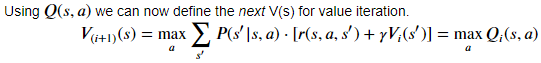

In [ ]:
# Next, we compute the state-value function, 
# which represents the expected cumulative discounted reward starting 
# from a particular state under any possible action. 
# This involves finding the maximum Q-value over all available actions.

In [ ]:
def get_new_state_value(mdp, state_values, state, gamma):
    """ Computes next V(s) as in formula above. Please do not change state_values in process. """
    if mdp.is_terminal(state):
        return 0

    Q = []
    for action in mdp.get_possible_actions(state):
        Q.append(get_action_value(mdp, state_values, state, action, gamma)) 
    
    return max(Q)

## Parameters

In [ ]:
# Discount Factor:
# Value Iteration uses a discount factor γ which determines the importance 
# given to future rewards compared to current ones. 
# A higher γ gives more weight to long-term rewards. 
# In our case, we use γ = 0.9.

In [ ]:
# parameters
gamma = 0.9            # discount for MDP
num_iter = 100         # maximum iterations, excluding initialization
# stop VI if new values are this close to old values (or closer)
min_difference = 0.001

## Convergence

In [ ]:
# We continue updating the state-value function until convergence, 
# meaning the differences between successive updates become small enough. 
# Here, we set the minimum acceptable difference to min_difference = 0.001.

In [ ]:
# initialize V(s)
state_values = {s: 0 for s in mdp.get_all_states()}

if has_graphviz:
    display(plot_graph_with_state_values(mdp, state_values))

for i in range(num_iter):

    # Compute new state values using the functions you defined above.
    # It must be a dict {state : float V_new(state)}
    new_state_values = {}
    for state in mdp.get_all_states():
        new_state_values[state] = get_new_state_value(mdp, state_values, state, gamma) 

    assert isinstance(new_state_values, dict)

    # Compute difference
    diff = max(abs(new_state_values[s] - state_values[s])
               for s in mdp.get_all_states())
    print("iter %4i   |   diff: %6.5f   |   " % (i, diff), end="")
    print("   ".join("V(%s) = %.3f" % (s, v) for s, v in state_values.items()))
    state_values = new_state_values

    if diff < min_difference:
        print("Terminated")
        break

In [ ]:
print("Final state values:", state_values)

assert abs(state_values["s0"] - 3.781) < 0.01
assert abs(state_values["s1"] - 7.294) < 0.01
assert abs(state_values["s2"] - 4.202) < 0.01

## Optimal Policy

In [ ]:
# Finally, once the state-value function converges, 
# we determine the optimal policy by choosing the action 
# with the highest Q-value for every state.

In [ ]:
def get_optimal_action(mdp, state_values, state, gamma=0.9):
    """ Finds optimal action using formula above. """
    if mdp.is_terminal(state):
        return None

    Q = []
    for action in mdp.get_possible_actions(state):
        Q.append(get_action_value(mdp, state_values, state, action, gamma)) 
    maxi = np.argmax(Q)
    return mdp.get_possible_actions(state)[maxi]

In [ ]:
assert get_optimal_action(mdp, state_values, "s0", gamma) == "a1"
assert get_optimal_action(mdp, state_values, "s1", gamma) == "a0"
assert get_optimal_action(mdp, state_values, "s2", gamma) == "a1"

assert get_optimal_action(mdp, {"s0": -1e10, "s1": 0, "s2": -2e10}, "s0", 0.9) == "a0", \
    "Please ensure that you handle negative Q-values of arbitrary magnitude correctly"
assert get_optimal_action(mdp, {"s0": -2e10, "s1": 0, "s2": -1e10}, "s0", 0.9) == "a1", \
    "Please ensure that you handle negative Q-values of arbitrary magnitude correctly"

In [ ]:
# Measure agent's average reward

s = mdp.reset()
rewards = []
for _ in range(10000):
    s, r, done, _ = mdp.step(get_optimal_action(mdp, state_values, s, gamma))
    rewards.append(r)

print("average reward: ", np.mean(rewards))

assert(0.40 < np.mean(rewards) < 0.55)

## Measuring Agent Reward

In [ ]:
# Measure agent's average reward

s = mdp.reset()
rewards = []
for _ in range(10000):
    s, r, done, _ = mdp.step(get_optimal_action(mdp, state_values, s, gamma))
    rewards.append(r)

print("average reward: ", np.mean(rewards))

assert(0.40 < np.mean(rewards) < 0.55)